## Graphe issue de tableTags

In [1]:
# requirements
import pandas as pd


In [2]:
df = pd.read_csv("cicd.csv")
df

,ID,Tags,Texte,Link,UpdatedAt,CreatedAt,Thumb
0,0,"jenkins,trigger",Modify Trigger on Jenkins,http://192.168.1.29:5050/static/files/linkedin...,1771160255,1771160189,http://192.168.1.29:5050/static/thumbs/linkedi...
1,1,"Prometheus,grafana",Add Prometheus as data Source to Grafana,http://192.168.1.29:5050/static/files/linkedin...,1771160099,1771160061,http://192.168.1.29:5050/static/thumbs/linkedi...
2,2,"Prometheus,blackbox",Install Blackbox,http://192.168.1.29:5050/static/files/linkedin...,1771159955,1771159857,http://192.168.1.29:5050/static/thumbs/linkedi...
3,3,"jenkins,mail notifications",Configure the Mail Notifications,http://192.168.1.29:5050/static/files/linkedin...,1771159800,1771159658,http://192.168.1.29:5050/static/thumbs/linkedi...
4,4,"jenkins,pipeline",Configure the Pipeline,http://192.168.1.29:5050/static/files/linkedin...,1771159526,1771159213,http://192.168.1.29:5050/static/thumbs/linkedi...
5,5,"jenkins,plugins,kubernetes",Install Kubernetes Plugins,http://192.168.1.29:5050/static/files/linkedin...,1771159089,1771158793,http://192.168.1.29:5050/static/thumbs/linkedi...
6,6,"jenkins,plugins,SonarQube",Install SonarQube Plugins,http://192.168.1.29:5050/static/files/linkedin...,1771158724,1771158636,http://192.168.1.29:5050/static/thumbs/linkedi...
7,7,"jenkins,plugins,docker",Install Docker Plugins,http://192.168.1.29:5050/static/files/linkedin...,1771158785,1771158728,http://192.168.1.29:5050/static/thumbs/linkedi...
8,8,"jenkins,plugins,Pipeline Stage View Plugins",Install Pipeline Stage View Plugins,http://192.168.1.29:5050/static/files/linkedin...,1771158583,1771158529,http://192.168.1.29:5050/static/thumbs/linkedi...
9,9,"jenkins,plugins,Maven Plugins",Install Maven Plugins,http://192.168.1.29:5050/static/files/linkedin...,1771158502,1771158413,http://192.168.1.29:5050/static/thumbs/linkedi...


### Graphe des données

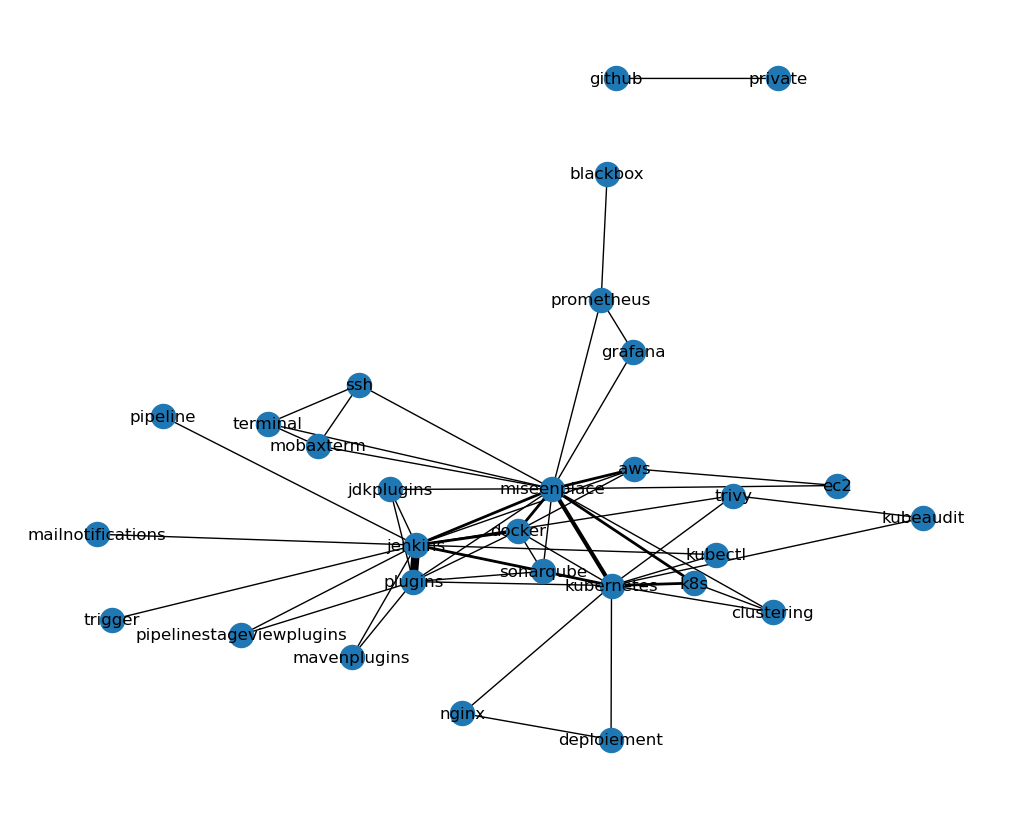

In [3]:
import itertools
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# Nettoyage des tags
df["Tags"] = df["Tags"].str.lower()
df["Tags"] = df["Tags"].str.replace(" ", "")
df["Tags"] = df["Tags"].str.split(",")

# Compter les co-occurrences
pairs = Counter()

for tags in df["Tags"]:
    for pair in itertools.combinations(sorted(tags), 2):
        pairs[pair] += 1

# Créer le graphe
G = nx.Graph()

for (tag1, tag2), weight in pairs.items():
    G.add_edge(tag1, tag2, weight=weight)

# Dessiner
pos = nx.spring_layout(G, k=0.5)
weights = [G[u][v]['weight'] for u,v in G.edges()]

plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True, width=weights)
plt.show()

### Graphe interactif des données

In [4]:
import pandas as pd
import itertools
from collections import Counter
import networkx as nx
from pyvis.network import Network

# Charger le CSV
df = pd.read_csv("cicd.csv")
df["Tags"] = df["Tags"].str.lower().str.replace(" ", "").str.split(",")

# Calculer les co-occurrences
pairs = Counter()
for tags in df["Tags"]:
    for pair in itertools.combinations(sorted(tags), 2):
        pairs[pair] += 1

# Créer le graphe NetworkX
G = nx.Graph()
for (tag1, tag2), weight in pairs.items():
    G.add_edge(tag1, tag2, weight=weight)

# Graphe interactif avec PyVis
net = Network(height="800px", width="100%", notebook=True)
net.from_nx(G)

# Affichage interactif
net.show("tags_graph.html")

tags_graph.html
